In [7]:
#1. zadatak

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    #1)
mtcars = pd.read_csv("mtcars.csv")
mtcars = mtcars.sort_values(by=['mpg'])
print('5 Lowest MPG cars:\n', mtcars[0:5]['car'])
#2)
print ( "\n")
eight_cyl_cars = mtcars[(mtcars.cyl == 8)]
print('3 Highest MPG cars with 8 cylnders:\n', eight_cyl_cars[-3:]['car'])
#3)
print ( "\n")
mtcars_new = mtcars.groupby('cyl')
print('Average MPG for 6 cylnder cars:\n', mtcars_new.mean().mpg[6])
#4)
print ( "\n")
four_cyl_2k_pounds = mtcars[(mtcars.cyl == 4) & ((mtcars.wt>=2) & (mtcars.wt<=2.2))]
print('4 cyl cars with mass between 2000 and 2200 lbs:\n',four_cyl_2k_pounds.mean().mpg)
 #5)
print ( "\n")
mtcars_new_2 = mtcars.groupby('am')
print('num of automatic cars: ', mtcars_new_2.count().car[0],'\nnum of manual cars: ', mtcars_new_2.count().car[1])
#6)
print ( "\n")
autoamtic_transmition_100hp_cars = mtcars[(mtcars.am == 0) & (mtcars['hp'] > 100)]
print('Num of cars with automatic transmition with over 100hp\n', autoamtic_transmition_100hp_cars.count().car)
#7)
print ( "\n")
POUNDS_TO_KG_FACTOR = 0.45359237
mtcars_new_3 = mtcars.copy()
mtcars_new_3['wt'] = mtcars_new_3['wt'].multiply(POUNDS_TO_KG_FACTOR * 1000)
print("Cars with weight values in kilograms:\n", mtcars_new_3[['car','wt']])

5 Lowest MPG cars:
 15    Lincoln Continental
14     Cadillac Fleetwood
23             Camaro Z28
6              Duster 360
16      Chrysler Imperial
Name: car, dtype: object


3 Highest MPG cars with 8 cylnders:
 12           Merc 450SL
4     Hornet Sportabout
24     Pontiac Firebird
Name: car, dtype: object


Average MPG for 6 cylnder cars:
 19.74285714285714


4 cyl cars with mass between 2000 and 2200 lbs:
 29.2


num of automatic cars:  19 
num of manual cars:  13


Num of cars with automatic transmition with over 100hp
 16


Cars with weight values in kilograms:
                     car           wt
15  Lincoln Continental  2460.285015
14   Cadillac Fleetwood  2381.359943
23           Camaro Z28  1741.794701
6            Duster 360  1619.324761
16    Chrysler Imperial  2424.451218
30        Maserati Bora  1619.324761
13          Merc 450SLC  1714.579159
22          AMC Javelin  1558.089791
21     Dodge Challenger  1596.645142
28       Ford Pantera L  1437.887813
11           Merc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


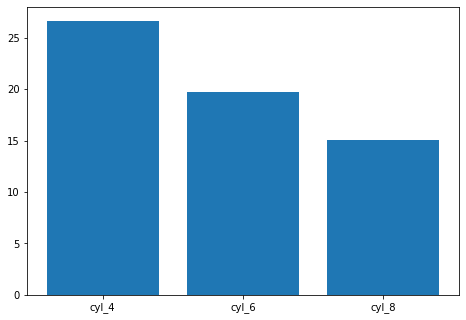

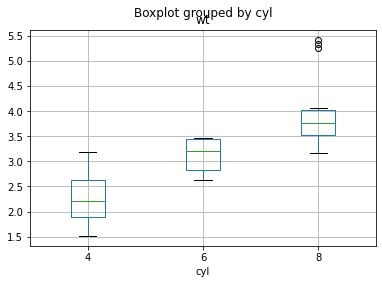

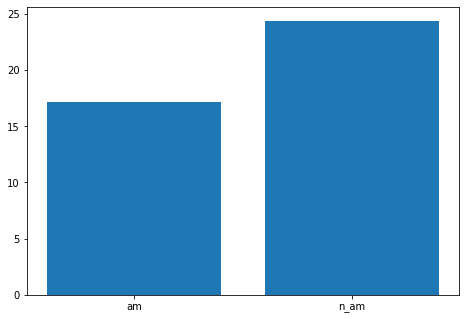

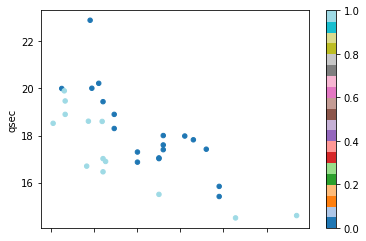

In [10]:
#2. zadatak

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

mtcars = pd.read_csv('mtcars.csv')

#1)
cyl_4=mtcars.query('cyl==4')['mpg'].mean()
cyl_6=mtcars.query('cyl==6')['mpg'].mean()
cyl_8=mtcars.query('cyl==8')['mpg'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['cyl_4','cyl_6','cyl_8']
y = [cyl_4,cyl_6,cyl_8]
ax.bar(x,y)


#2)
boxplot=mtcars.boxplot(column=['wt'],by='cyl')

#3)
am=mtcars.query('am==0')['mpg'].mean()
n_am=mtcars.query('am==1')['mpg'].mean()

fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
x1 = ['am','n_am']
y1 = [am,n_am]
ax1.bar(x1,y1)
#4)
cars=mtcars.groupby(by='am')
ax1=mtcars.plot.scatter(x='hp',y='qsec',c=mtcars['am'],cmap='tab20')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


       vrijeme  month
0   2017-11-09     11
1   2017-11-10     11
2   2017-11-11     11
3   2017-11-12     11
4   2017-12-15     12
5   2017-12-16     12
6   2017-12-17     12
7   2017-12-18     12
8   2017-12-19     12
9   2017-12-20     12
10  2017-12-30     12
11  2017-12-31     12


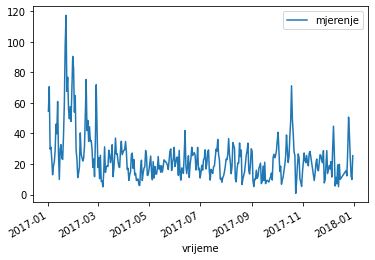

In [11]:
#3. zadatak

import urllib
import pandas as pd
import xml.etree.ElementTree as ET

url = 'http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017'

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
while True:
    
    try:
        obj = root.getchildren()[i].getchildren()
    except:
        break
    
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1

df.vrijeme = pd.to_datetime(df.vrijeme)
df.plot(y='mjerenje', x='vrijeme');


df['vrijeme'] = pd.to_datetime(df['vrijeme'],utc=True)
df['vrijeme'] = df['vrijeme'].dt.date                              
df['month'] = pd.DatetimeIndex(df['vrijeme']).month
df['dayOfweek'] = pd.DatetimeIndex(df['vrijeme']).dayofweek


mv = pd.DataFrame(columns=('vrijeme', 'month'))
mv['vrijeme']=pd.date_range(start='2017-01-01',end='2017-12-31').difference(df.vrijeme)
mv['vrijeme'] = pd.to_datetime(mv['vrijeme'],utc=True)
mv['vrijeme'] = mv['vrijeme'].dt.date                              
mv['month'] = pd.DatetimeIndex(mv['vrijeme']).month
print(mv)